# ANLY 605 Project Step 2 : Group 11
# Risk of Severe Depression based on Personality types & Socioeconomic Factors



## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

depression=pd.read_csv("../data/depression_overall.csv")

In [2]:
# Data head 
depression=depression.drop(depression.columns[0], axis=1)
depression.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,age,religion,orientation,race,married,familysize,VCL,Condition,target
0,1,5,7,7,7,7,7,5,1,1,...,2,16,12,1,10,1,2,8,Severe,4
1,6,5,4,7,5,4,7,7,1,5,...,2,16,7,0,70,1,4,8,Severe,4
2,2,5,2,2,5,6,5,5,3,2,...,2,17,4,3,60,1,3,7,Extremely Severe,0
3,1,1,7,4,6,4,6,1,6,1,...,2,13,4,5,70,1,5,7,Moderate,2
4,2,5,3,6,5,5,5,6,3,3,...,2,19,10,1,10,1,4,10,Extremely Severe,0


In [3]:
depression.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,urban,gender,age,religion,orientation,race,married,familysize,VCL,target
count,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,...,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000,39763.000000
mean,3.786309,4.192843,4.742474,5.172824,4.934789,4.851445,5.274149,4.280914,3.649825,3.731031,...,2.220280,1.789528,23.401906,7.555692,1.642482,31.314036,1.159495,3.500314,6.761437,1.770716
std,1.902582,1.823063,1.803086,1.825207,1.722572,1.904024,1.625170,1.968965,1.830462,1.863983,...,0.804731,0.444143,8.572755,3.554449,1.350980,25.871676,0.445808,1.921140,2.735020,1.510594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,13.000000,0.000000,0.000000,10.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,18.000000,4.000000,1.000000,10.000000,1.000000,2.000000,5.000000,0.000000
50%,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,4.000000,4.000000,...,2.000000,2.000000,21.000000,10.000000,1.000000,10.000000,1.000000,3.000000,7.000000,2.000000
75%,5.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,6.000000,5.000000,5.000000,...,3.000000,2.000000,25.000000,10.000000,2.000000,60.000000,1.000000,4.000000,9.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,3.000000,89.000000,12.000000,5.000000,70.000000,3.000000,26.000000,13.000000,4.000000


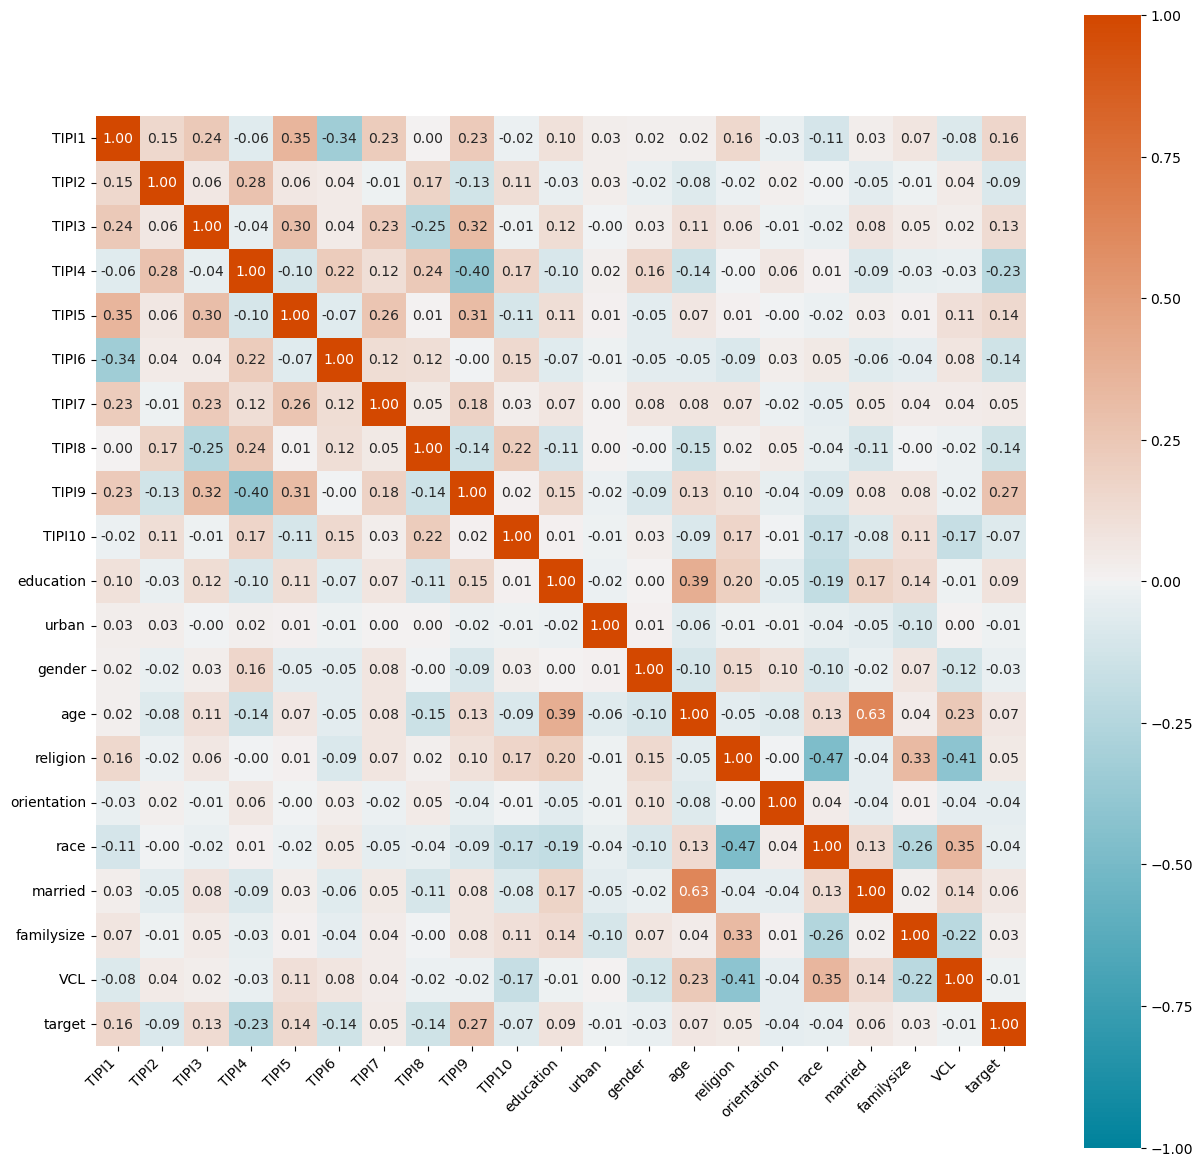

In [4]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 15,15
rcParams['figure.dpi'] = 100
corr_g11 = depression.corr()
ax = sns.heatmap(
    corr_g11, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, s=100, as_cmap=True),
    square=True,
    annot=True, fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.rc('font',size=13)
plt.show()


In [5]:
depression.to_csv("../data/depression_graph.csv")

## Data Processing

The age column is a continuous variable that is being binned into 4 groups. All the categorical columns have more than 2 categories hence they are encoded using pandas get dummies. The familysize and VCL variables are normalized.

The target variable has 5 categories 'Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'. The are combined to form two categories **Severe = 1** which includes 'Severe', 'Extremely Severe' and **Not Severe = 0** which includes 'Normal', 'Mild', 'Moderate'.

In [6]:
depression['AgeBand'] = pd.cut(depression['age'], 4)
depression[['AgeBand','target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


multi_cols=['education', 'urban', 'gender', 'religion', 'orientation',
       'race', 'married','AgeBand']

#Duplicating columns for multi value columns
depression = pd.get_dummies(data = depression, columns = multi_cols)



In [7]:
# Combining target categories
depression['target'] = np.where(
     depression['target'].between(-1, 3, inclusive=False), 0, 1)

/var/folders/gc/n0p2_5d52qz9v6vm5nmmszx40000gn/T/ipykernel_1668/3118415444.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  depression['target'].between(-1, 3, inclusive=False), 0, 1)


In [8]:

#Finding the mean and standard deviation of x and normalizing train x 
u_x_vcl = np.mean(depression['VCL'])
sigma_x_vcl = np.std(depression['VCL'])
depression['VCL'] = (depression['VCL'] - u_x_vcl)/sigma_x_vcl

#Finding the mean and standard deviation of y and normalizing train y 
u_x_familysize = np.mean(depression['familysize'])
sigma_x_familysize = np.std(depression['familysize'])
depression['familysize'] = (depression['familysize'] - u_x_familysize)/sigma_x_familysize

# Changing names of columns to remove ',' and brackets
depression.rename(columns={'AgeBand_(12.924, 32.0]': 'AgeBand_1','AgeBand_(32.0, 51.0]':'AgeBand_2',
                            'AgeBand_(51.0, 70.0]':'AgeBand_3','AgeBand_(70.0, 89.0]':'AgeBand_4'}, inplace=True)

In [9]:

depression.drop(['Condition','age'],axis=1,inplace=True)

depression_targets=depression['target']
depression_targets=depression_targets.astype('category')
depression.drop('target',axis=1,inplace=True)

depression.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,race_60,race_70,married_0,married_1,married_2,married_3,AgeBand_1,AgeBand_2,AgeBand_3,AgeBand_4
0,1,5,7,7,7,7,7,5,1,1,...,0,0,0,1,0,0,1,0,0,0
1,6,5,4,7,5,4,7,7,1,5,...,0,1,0,1,0,0,1,0,0,0
2,2,5,2,2,5,6,5,5,3,2,...,1,0,0,1,0,0,1,0,0,0
3,1,1,7,4,6,4,6,1,6,1,...,0,1,0,1,0,0,1,0,0,0
4,2,5,3,6,5,5,5,6,3,3,...,0,0,0,1,0,0,1,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

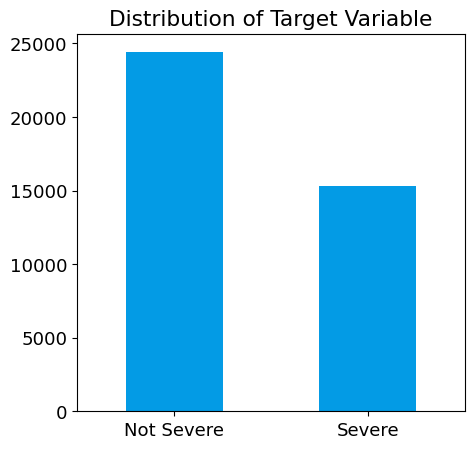

In [10]:
rcParams['figure.figsize'] = 5,5
rcParams['figure.dpi'] = 100
c=depression_targets.value_counts()
c.plot(kind = 'bar', color ='#039be5')
y_pos = np.arange(2)
plt.xticks(y_pos,['Not Severe','Severe'],rotation=0)
plt.title('Distribution of Target Variable')
plt.show


## Models

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(depression,depression_targets, test_size=0.25)

### Base Model - Logistic Regression

In [12]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l1')
pred_lr = lr.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      6108
           1       0.64      0.40      0.49      3833

    accuracy                           0.68      9941
   macro avg       0.67      0.63      0.63      9941
weighted avg       0.67      0.68      0.66      9941



### Ensemble and Stacking

In [13]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
import plotly.express as px

In [14]:
# Function to evaluate the list of models
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise')
    return scores


In [15]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('AdaBoost', AdaBoostClassifier()))
    level0.append(('Ridge', RidgeClassifier()))
    level0.append(('RF', RandomForestClassifier()))
    level0.append(('GBM', GradientBoostingClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def base_models():
    models = dict()
    models['AdaBoost'] = AdaBoostClassifier()
    models["Ridge"] = RidgeClassifier()
    models["Random Forest"] = RandomForestClassifier()
    models['GBM'] = GradientBoostingClassifier()
    models["Stacked Model"] = get_stacking()
    return models

def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise')
    return scores

In [16]:
# models = base_models()
# # evaluate the models and store results
# results, names = list(), list() 

# for name, model in models.items():
#   scores = eval_models(model)
#   results.append(scores)
#   names.append(name)
#   print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

# regressmod = pd.DataFrame(np.transpose(results), columns = ['AdaBoost',"Ridge","Random Forest",'GBM',"Stacked"])
# regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=['AdaBoost',"Ridge","Random Forest",'GBM',"Stacked"])

In [17]:
# fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
# labels={"variable": "Machine Learning Model",
#         "value": "Accuracy"
#         },title="Model Performance")
# fig.show()

In [18]:
# fig.write_image("../figures/Boxplot_candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)


### Final Model

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      6108
           1       0.65      0.39      0.49      3833

    accuracy                           0.68      9941
   macro avg       0.67      0.63      0.63      9941
weighted avg       0.68      0.68      0.66      9941



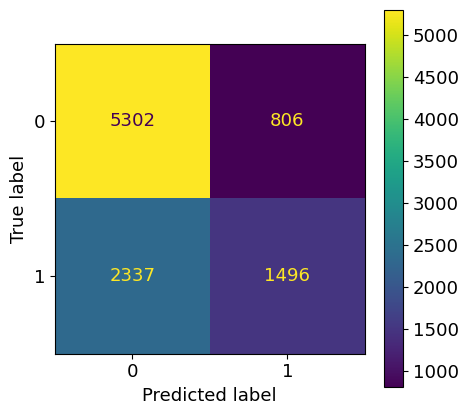

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model=get_stacking()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()



In [22]:
import bz2
import pickle
import _pickle as cPickle

In [23]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f: 
        cPickle.dump(data, f)

In [29]:
pkl_filename = "../StackedPickle_A"
compressed_pickle(pkl_filename, model) 

In [27]:
# Load any compressed pickle file
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

In [30]:
data = decompress_pickle("../StackedPickle_A.pbz2") 

In [31]:
score = data.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = data.predict(X_test)

Test score: 68.38 %


In [26]:
import pickle

# Save to file in the current working directory
pkl_filename = "../StackedPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)


In [27]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 68.37 %
